In [ ]:
'''From the 'iris' dataset, predict the optimum number of clusters and represent them virtually.
Iris dataset is present in default with python so i have not downloaded the dataset
I have used KMeans for solving this problem since it is the most sought after algorithm when it comes to clustering'''

In [4]:
'''Importing the libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
'''Loading the data set// datasets.load_iris() for loading the by default available dataset
IMPORTING THE DATA SET '''
data = pd.read_csv('iris.csv')
X = data.iloc[:, [1, 2]].values
''' In this case i have considered only first two columns i.e sepal length and sepla width so as to visualize them properly'''

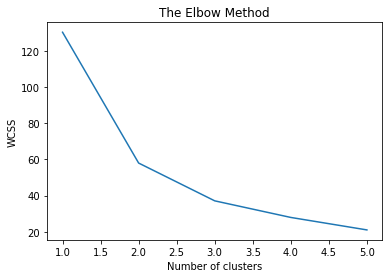

'By looking at the below plot we can see that as the number of clusters increases the wcss decreases\nBt as we can see that till the cluster 3 the value of wcss decreases with a huge difference after that it decreases very slowly(curve starts becoming flat)\nSo the optimal value for number of cluster is 3'

In [15]:
'''Using the ELBOW METHOD to find the optimal number of cluster 
wcss --> within cluster sum of squares'''
from sklearn.cluster import KMeans
# wcss is a list used to get the sum of squares within a cluster
wcss = []
for i in range(1, 6):
    #init is used so as not to fall to random initialization trap, kmeans++ take care of that
    km = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    km.fit(X)
    #inertia_ attribute gives us the sum of squares of distances between the points and its centroid
    wcss.append(km.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
'''By looking at the below plot we can see that as the number of clusters increases the wcss decreases
Bt as we can see that till the cluster 3 the value of wcss decreases with a huge difference after that it decreases very slowly(curve starts becoming flat)
So the optimal value for number of cluster is 3''' 

In [16]:
'''Training the kmeans model on the dataset'''
km = KMeans(n_clusters=3, init='k-means++', random_state=42)
#fit_predict() not only trains the algorithm but also returns the dependent variable that we want
y_pred = km.fit_predict(X)

In [17]:
print(y_pred)
'''As you can see depending upon some similarities the samples are grouped together into 3 groups referred as clusters'''

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


'As you can see depending upon some similarities the samples are grouped together into 3 groups referred as clusters'

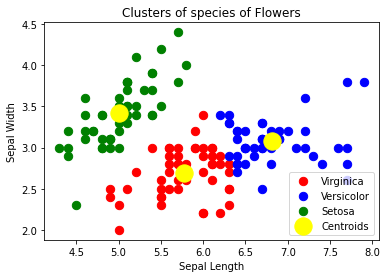

In [21]:
'''Visualizing the clusters '''
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=70, c='red', label='Virginica')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=70, c='blue', label='Versicolor')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=70, c='green', label='Setosa')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of species of Flowers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [ ]:
'''Some insights from the above scatter plot
1) The species which have longer sepal length, but shorter sepal width comes under versicolor species.
2) The species which have average sepal length and small to average sepal width fall under virginica category.
3) The species which have higher sepal width but length is very less comes under setosa category.'''